In [1]:
import csv

with open(r"C:\Users\cgokmen\Downloads\BEHAVIOR-1K Tasks (4).csv") as f:
    reader = csv.DictReader(f)
    tasks = {row["Task Name"]: {x.strip() for x in row["Required Features"].split(",")} for row in reader}

In [2]:
tasks

{'adding_chemicals_to_hot_tub-0': {'', 'physical substance'},
 'adding_chemicals_to_lawn-0': {'', 'physical substance'},
 'adding_chemicals_to_pool-0': {'', 'physical substance'},
 'adding_fabric_softener-0': {'', 'physical substance', 'visual substance'},
 'applying_pesticides-0': {'', 'physical substance'},
 'assembling_furniture-0': {'', 'attachment'},
 'assembling_gift_baskets-0': {''},
 'attach_a_camera_to_a_tripod-0': {''},
 'bag_groceries-0': {''},
 'baking_cookies_for_the_PTA_bake_sale-0': {'',
  'attachment',
  'physical substance',
  'transition'},
 'baking_sugar_cookies-0': {'',
  'attachment',
  'physical substance',
  'transition'},
 'boil_water-0': {'', 'physical substance', 'transition'},
 'boil_water_in_the_microwave-0': {'', 'physical substance', 'transition'},
 'bottling_wine-0': {'', 'physical substance'},
 'boxing_books_up_for_storage-0': {''},
 'boxing_food_after_dinner-0': {''},
 'brewing_coffee-0': {'', 'physical substance', 'transition'},
 'bringing_glass_to_rec

In [13]:
assert all("" in reqd_features for reqd_features in tasks.values())

In [10]:
# Create our feature order
features = ["", "visual substance", "transition", "physical substance", "attachment", "cloth"]

# Create the cumulative sets
cumulative_features = [set(features[:i+1]) for i in range(len(features))]
print(cumulative_features)

[{''}, {'', 'visual substance'}, {'', 'visual substance', 'transition'}, {'', 'visual substance', 'physical substance', 'transition'}, {'', 'physical substance', 'attachment', 'transition', 'visual substance'}, {'', 'physical substance', 'attachment', 'cloth', 'transition', 'visual substance'}]


In [39]:
# Find the number of tasks that fall into each cumulative feature set
def task_count(feature_set):
    return sum(1 for reqd_features in tasks.values() if len(reqd_features - feature_set) == 0)

task_counts = [len(tasks) - task_count(set(features) - {f}) for f in features]
cumulative_task_counts = [task_count(fs) for fs in cumulative_features]

In [40]:
task_counts

[1022, 330, 161, 547, 69, 44]

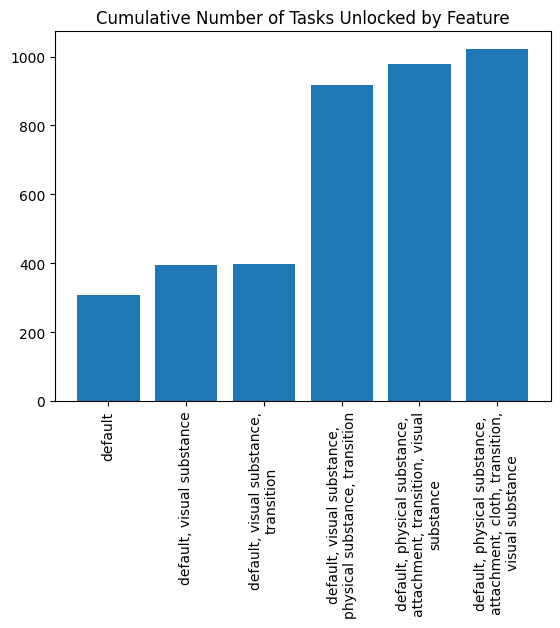

In [44]:
from matplotlib import pyplot as plt
import textwrap

labels = [textwrap.fill("default" + ", ".join(cf), 30) for cf in cumulative_features]
plt.bar(range(len(cumulative_features)), cumulative_task_counts, tick_label=labels)
plt.title("Cumulative Number of Tasks Unlocked by Feature")
plt.xticks(rotation=90)
plt.show()

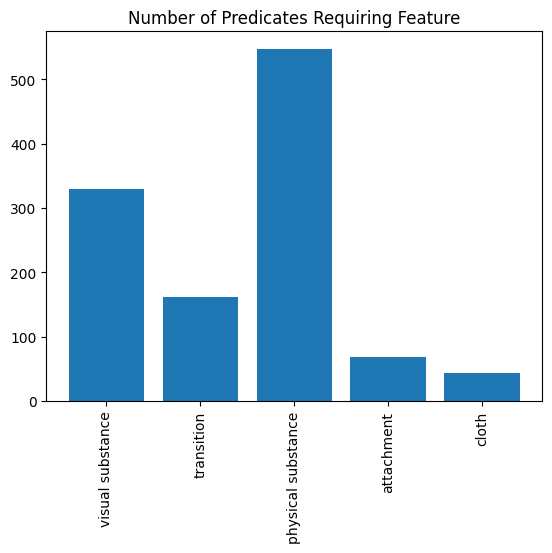

In [43]:
plt.bar(range(len(features) - 1), task_counts[1:], tick_label=features[1:])
plt.xticks(rotation=90)
plt.title("Number of Predicates Requiring Feature")
plt.show()